# Figure 1(h)

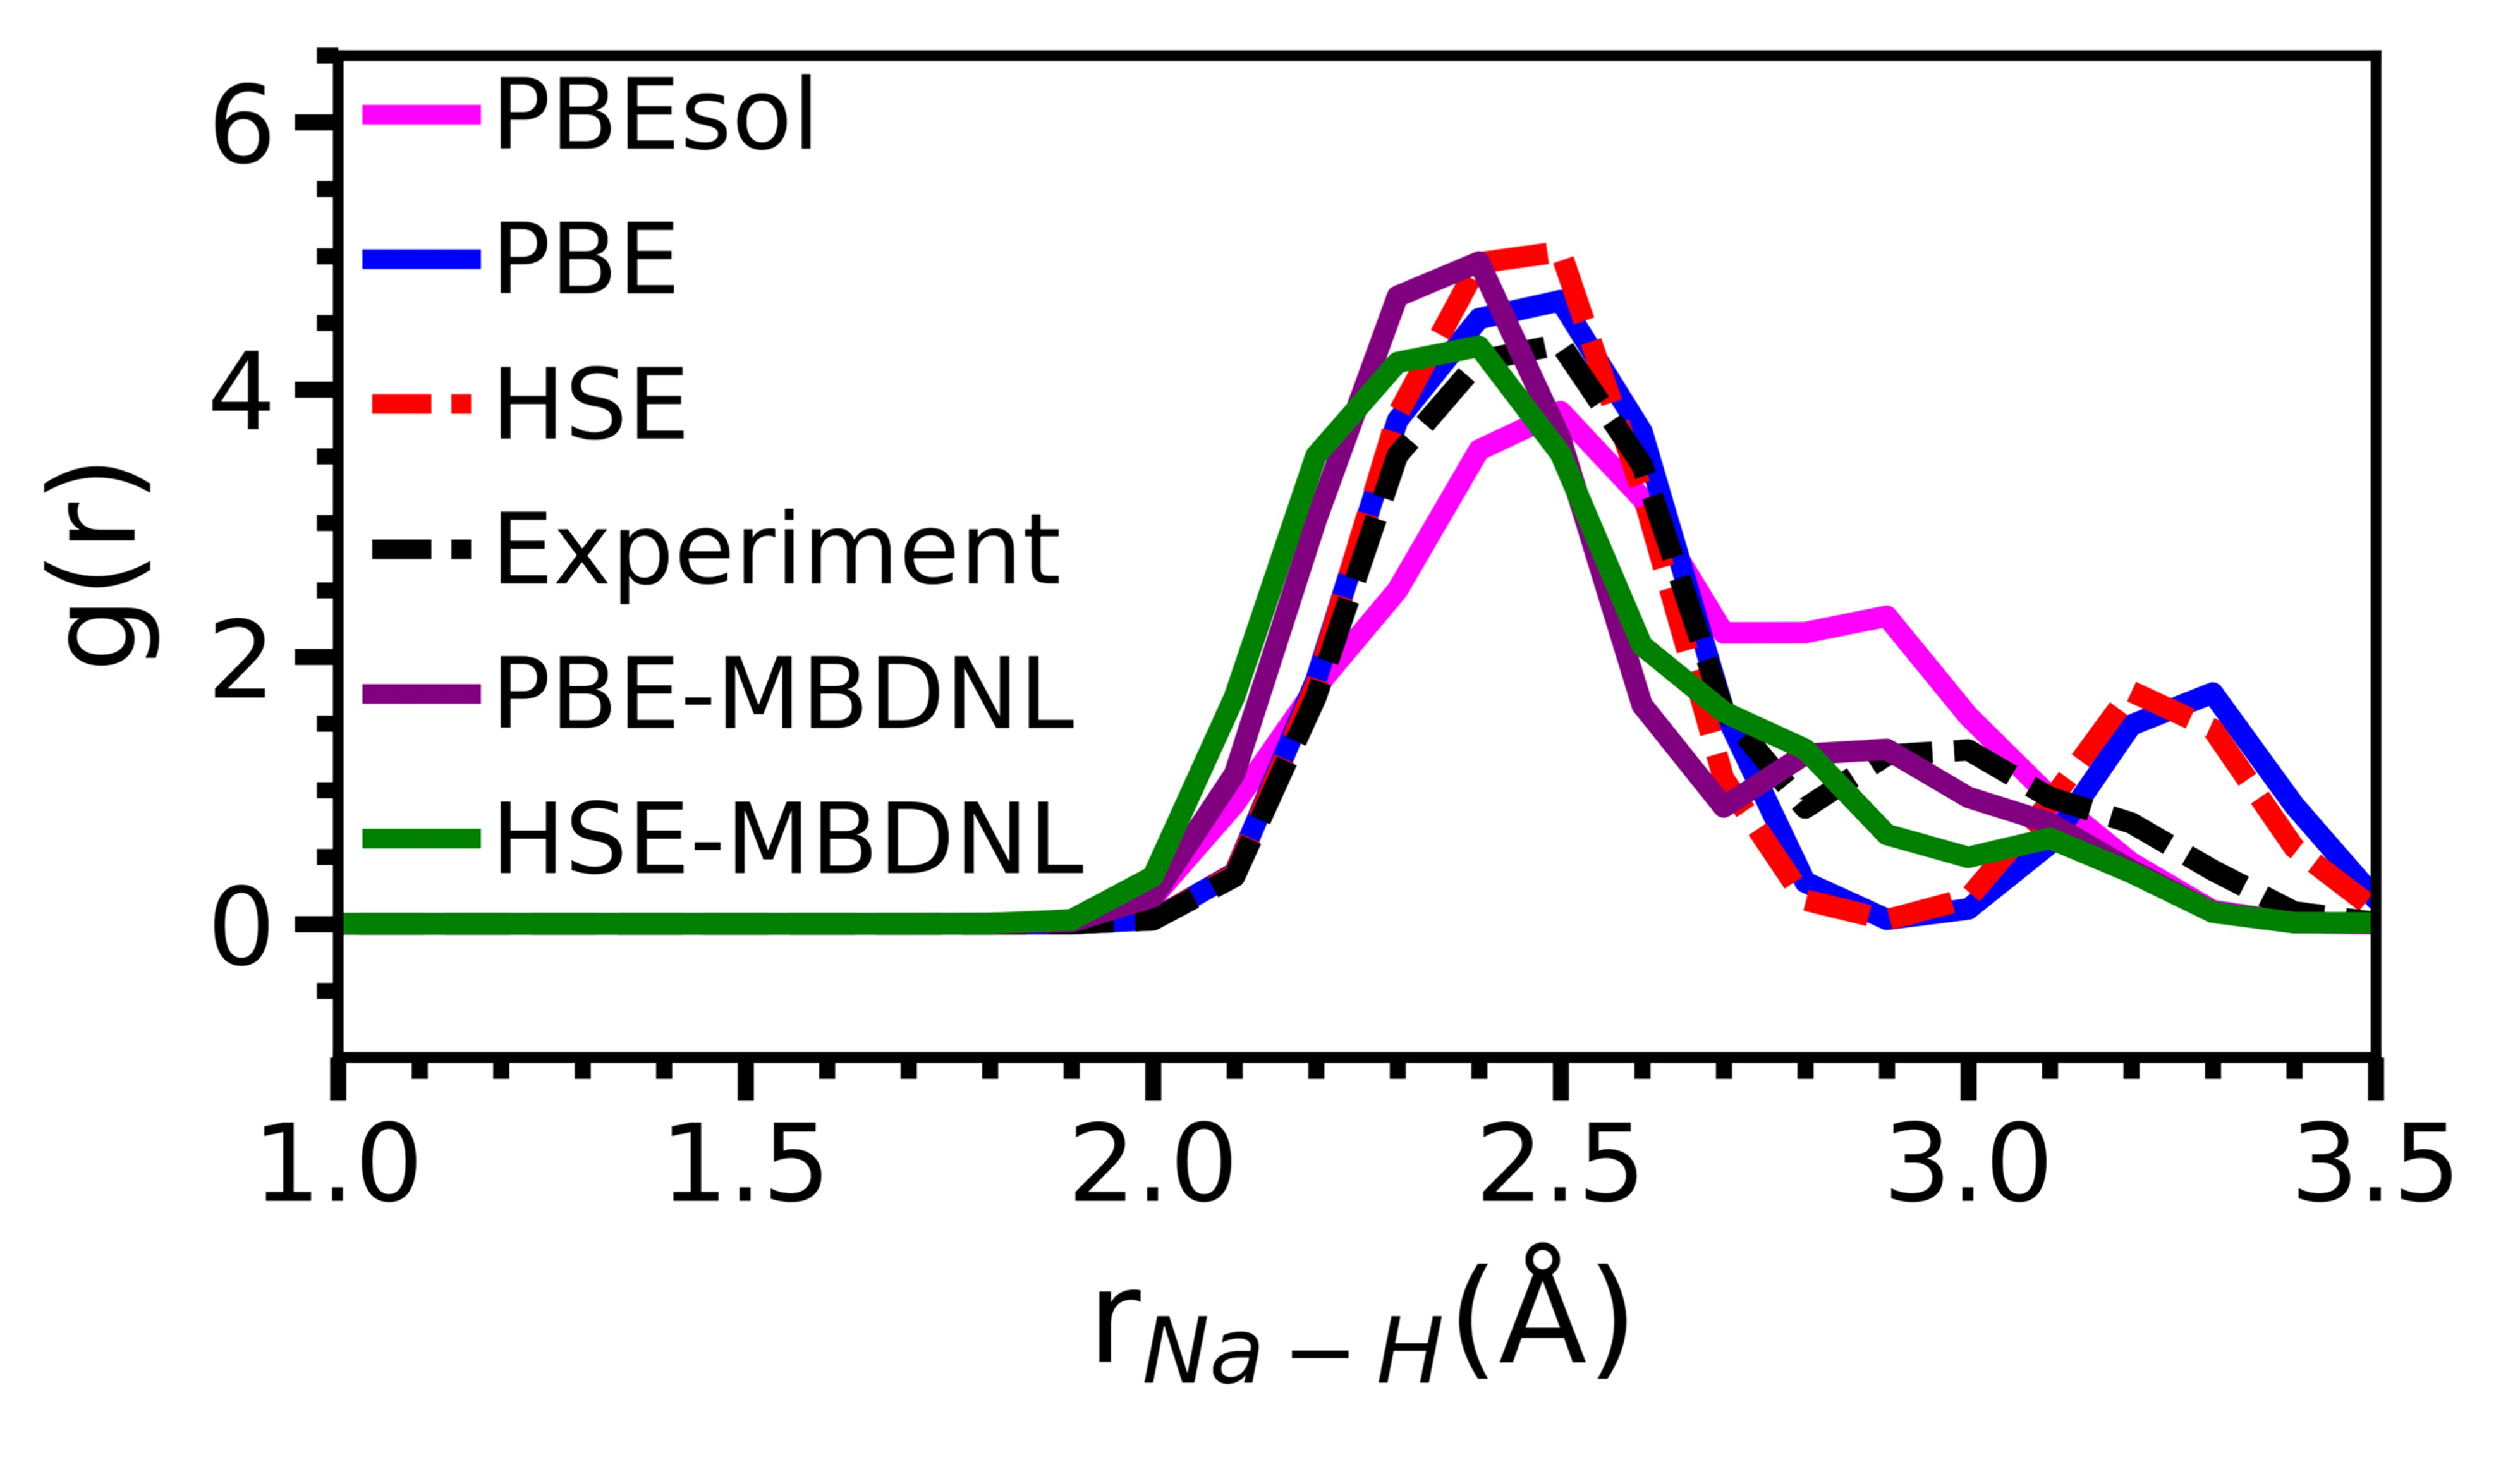

In [2]:
from pymatgen.core.structure import Structure
from pymatgen.analysis.diffusion.aimd.rdf import RadialDistributionFunctionFast
import matplotlib.pyplot as plt

p='/Li2B12H12/fhiaims/local_st/'
s1=Structure.from_file(p+"exp_na.vasp")
s2=Structure.from_file(p+"pbesol.vasp")
s3=Structure.from_file(p+"pbe.vasp")
s4=Structure.from_file(p+"hse.vasp")
s5=Structure.from_file(p+"pbe_mbdnl.vasp")
s6=Structure.from_file(p+"hse_mbdnl.vasp")
RDF_s1=RadialDistributionFunctionFast(s1,sigma=0.01)
RDF_s2=RadialDistributionFunctionFast(s2,sigma=0.01)
RDF_s3=RadialDistributionFunctionFast(s3,sigma=0.01)
RDF_s4=RadialDistributionFunctionFast(s4,sigma=0.01)
RDF_s5=RadialDistributionFunctionFast(s5,sigma=0.01)
RDF_s6=RadialDistributionFunctionFast(s6,sigma=0.01)
cn_s1_nh = RDF_s1.get_rdf("Na", "H")
cn_s2_nh = RDF_s2.get_rdf("Na", "H")
cn_s3_nh = RDF_s3.get_rdf("Na", "H")
cn_s4_nh = RDF_s4.get_rdf("Na", "H")
cn_s5_nh = RDF_s5.get_rdf("Na", "H")
cn_s6_nh = RDF_s6.get_rdf("Na", "H")


plt.figure(figsize=(7.5,4.3))
plt.plot(cn_s2_nh[0],cn_s2_nh[1], label="PBEsol",linewidth=4, c="magenta")
plt.plot(cn_s3_nh[0],cn_s3_nh[1], label="PBE",linewidth=4, c="blue")
plt.plot(cn_s4_nh[0],cn_s4_nh[1], label="HSE",linewidth=4, c="red",dashes=[3,1])
plt.plot(cn_s1_nh[0],cn_s1_nh[1], label="Experiment",linewidth=4,c="black",dashes=[3,1])
plt.plot(cn_s5_nh[0],cn_s5_nh[1], label="PBE-MBDNL",linewidth=4, c="purple")
plt.plot(cn_s6_nh[0],cn_s6_nh[1], label="HSE-MBDNL",linewidth=4, c="green")

plt.xlabel("r$_{Na-H}$(Å)", fontsize=24)
plt.ylabel("g(r)", fontsize=22, labelpad=10)
plt.ylim(-1,6.5)
plt.xlim(1,3.5)
plt.minorticks_on()
plt.legend(fontsize='20', edgecolor='none', facecolor='none') 
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5], fontsize=20)
plt.show()

# Figure 7(a)

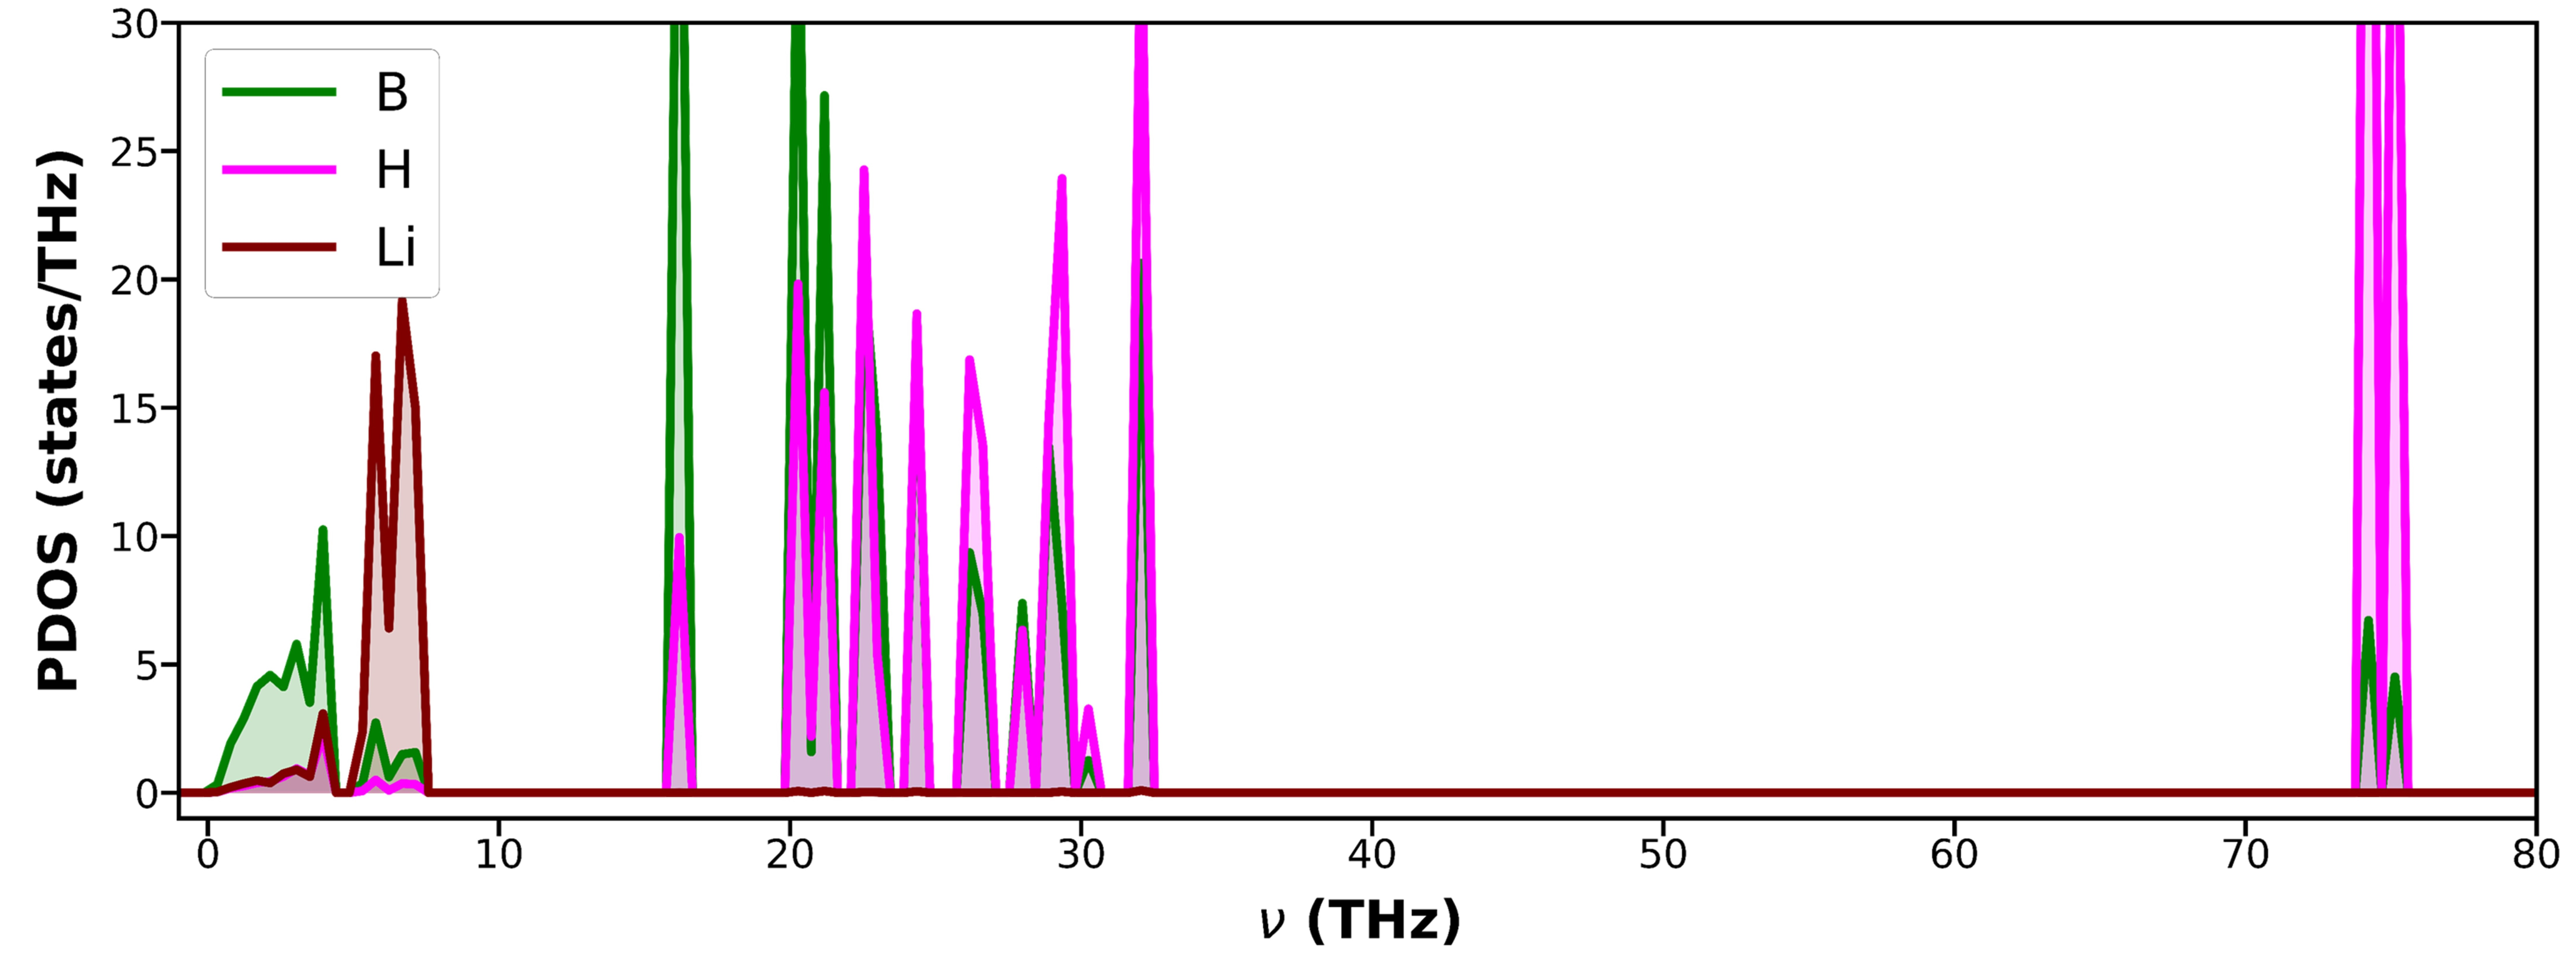

In [2]:
import phonopy
import numpy as np

data = np.loadtxt("/Li2B12H12/fhiaims/pbesol/phonon/phonopy/output/projected_dos.dat")

atom_groups = {
    'B': list(range(9, 57)),    
    'H': list(range(57, 105)),
    'Li': list(range(1, 9))                
}

plt.figure(figsize=(80, 30))


line_styles = ['-', '-', '-']
line_colors =  ['green', 'magenta', '#800000']
fill_alphas = [0.2, 0.2, 0.2] 
for i, (atom_type, atom_indices) in enumerate(atom_groups.items()):
    projected_dos = np.sum(data[:, atom_indices], axis=1)
    plt.plot(data[:, 0], projected_dos, label=atom_type, linestyle=line_styles[i], color=line_colors[i], linewidth=20)
    plt.fill_between(data[:, 0], projected_dos, alpha=fill_alphas[i], color=line_colors[i])

plt.xlim(-1, 80)
plt.ylim(-1, 30)
plt.xlabel(r'$\nu$ (THz)', fontweight='bold', labelpad=50)
plt.ylabel('PDOS (states/THz)', fontweight='bold', labelpad=50)
plt.legend(fontsize=120, edgecolor='black', loc='upper left')
plt.tight_layout()
plt.show()

# Figure 5(a)

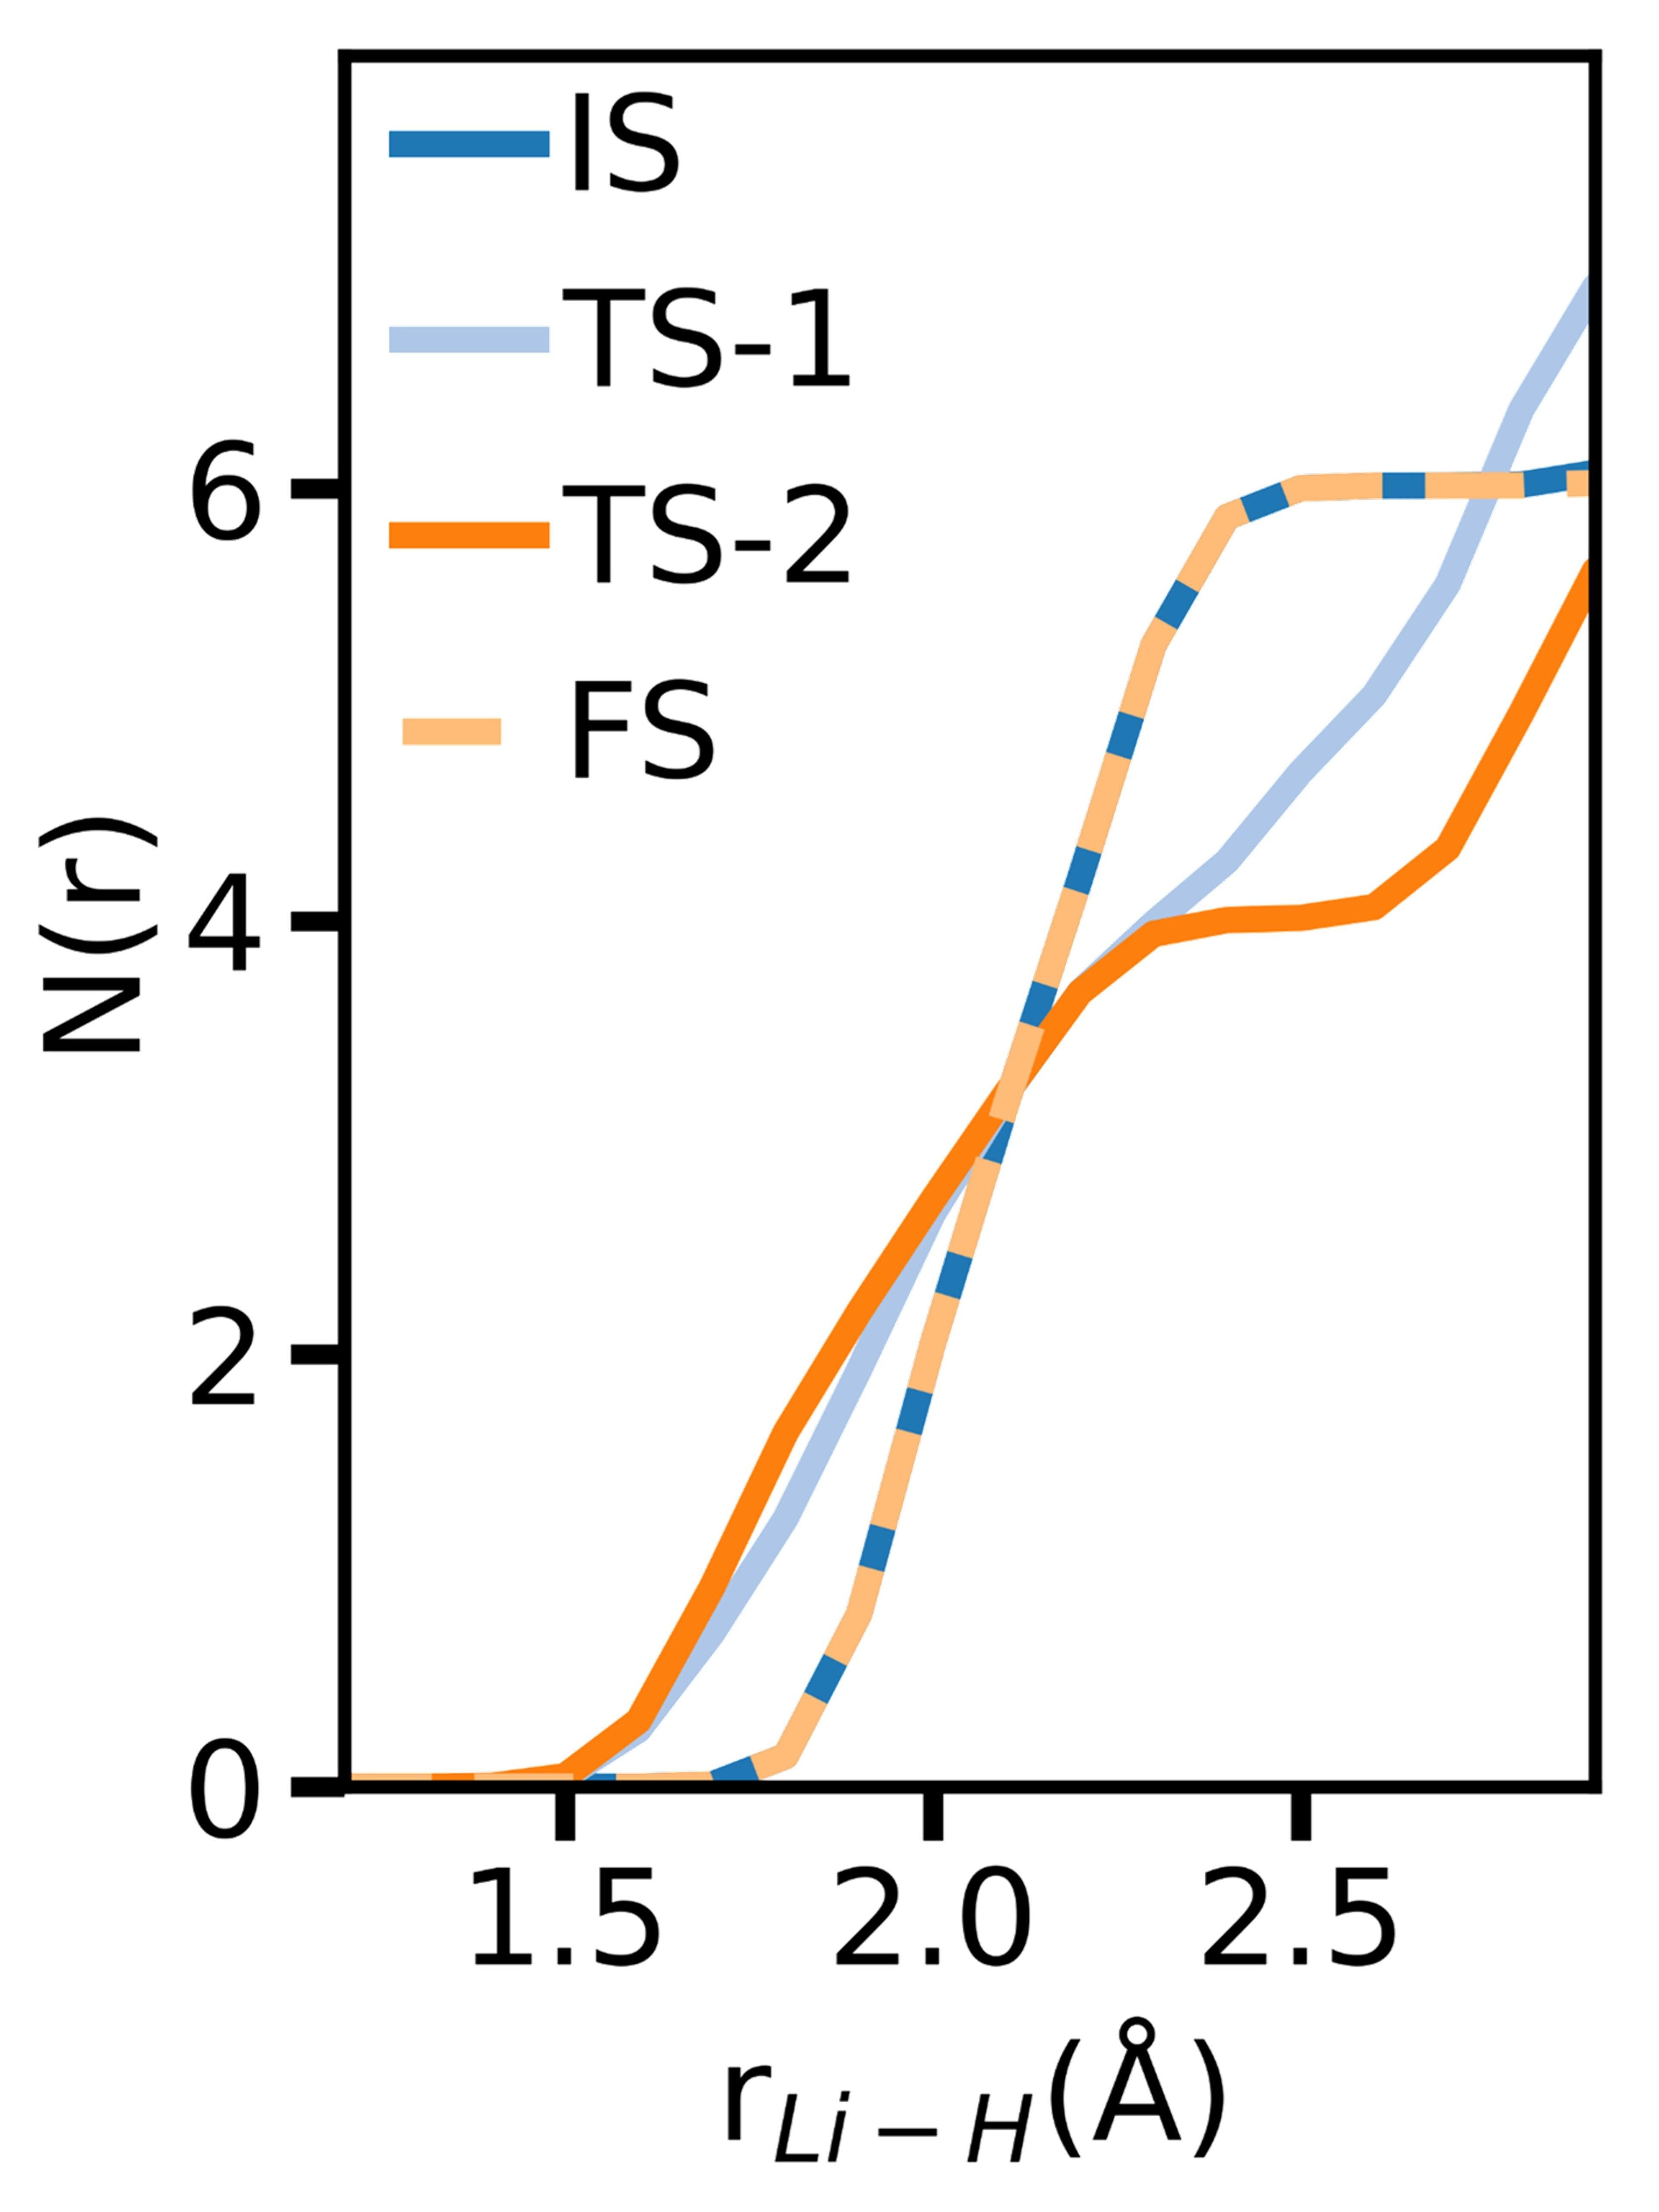

In [4]:
p1 = "/Li2B12H12/fhiaims/pbesol/climb_neb/distinct_paths/13/hse06_mbd_scf/optimized/"

path_IS = p1 + "image002/nci/3_anion_cation/selected/tri/geometry.vasp"
path_TS1 = p1 + "image006/nci/3_anion_cation/selected/geometry.vasp"
path_TS2 = p1 + "image010/nci/3_anion_cation/selected/tri/geometry.vasp"
path_FS = p1 + "image014/nci/3_anion_cation/selected/tri/geometry.vasp"

cmap = plt.get_cmap('tab20')
color_IS = cmap(0)
color_TS1 = cmap(1)
color_TS2 = cmap(2)
color_FS = cmap(3)

plt.figure(figsize=(4, 6))
st_IS = Structure.from_file(path_IS)
RDF_IS = RadialDistributionFunctionFast(st_IS, sigma=0.01)
r_IS, g_r_IS = RDF_IS.get_coordination_number("Li", "H")
plt.plot(r_IS, g_r_IS, label="IS", color=color_IS, linestyle="-")

st_TS1 = Structure.from_file(path_TS1)
RDF_TS1 = RadialDistributionFunctionFast(st_TS1, sigma=0.01)
r_TS1, g_r_TS1 = RDF_TS1.get_coordination_number("Li", "H")
plt.plot(r_TS1, g_r_TS1, label="TS-1", color=color_TS1, linestyle="-")

st_TS2 = Structure.from_file(path_TS2)
RDF_TS2 = RadialDistributionFunctionFast(st_TS2, sigma=0.01)
r_TS2, g_r_TS2 = RDF_TS2.get_coordination_number("Li", "H")
plt.plot(r_TS2, g_r_TS2, label="TS-2", color=color_TS2, linestyle="-")

st_FS = Structure.from_file(path_FS)
RDF_FS = RadialDistributionFunctionFast(st_FS, sigma=0.01)
r_FS, g_r_FS = RDF_FS.get_coordination_number("Li", "H")
plt.plot(r_FS, g_r_FS, label="FS", color=color_FS, linestyle="--")
plt.xlabel("r$_{Li-H}$(Å)", fontsize=20)
plt.ylabel("N(r)", fontsize=20)
plt.legend(fontsize=20, facecolor='none', edgecolor='none')
plt.xlim(1.2, 10)
plt.show()